# Analysis of the 25 largest retailers in the U.S

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [3]:
# Import data here
df = pd.read_csv('largest_us_retailers.csv')
df.head()

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores


### 0. Which company sold more?

In [ ]:
df_sorted = df.sort_values('Sales', ascending=0)
df_sorted.head()

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores


It shows that Walmart Us has the highest sales with $658,119 million. We can verify this by the following code which shows the highest sales value and the company it belongs to.

In [ ]:
venta_max = df_sorted['Sales'].max()
compañia = ['Company', 'Sales']
print(df[df.Sales == venta_max][compañia])

      Company   Sales
0  Walmart US  658119


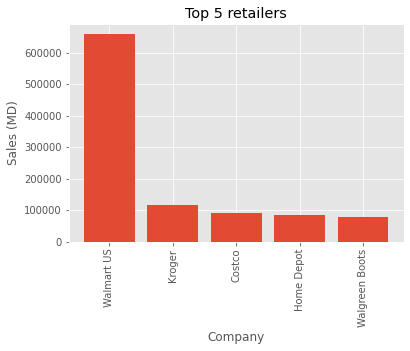

In [ ]:
#visualization of the result by means of a bar chart
x = df_sorted['Company'][0:5]
y = df_sorted['Sales'][0:5]

plt.bar(x,y)
plt.title('Top 5 retailers')
plt.xlabel('Company')
plt.ylabel('Sales (MD)')
plt.xticks(rotation='vertical')
plt.show()

Highlights:

Walmart US is the company that generated the most sales. It surpasses Kroeger, which is in second position, by 5 times.
The 4 companies that follow Walmart US have similar sales. Competing directly against Walmart US may not be the best option because of its dominant position.

### 1. What is the average sales excluding the dominant company?

In [ ]:
#Dataframe
df = pd.read_csv('largest_us_retailers.csv')

#We order the values of Sales from highest to lowest
df = df.sort_values('Sales', ascending = False)

#Calculation of average sales excluding the parent company
df['Sales'][1:].mean()

46602.416666666664

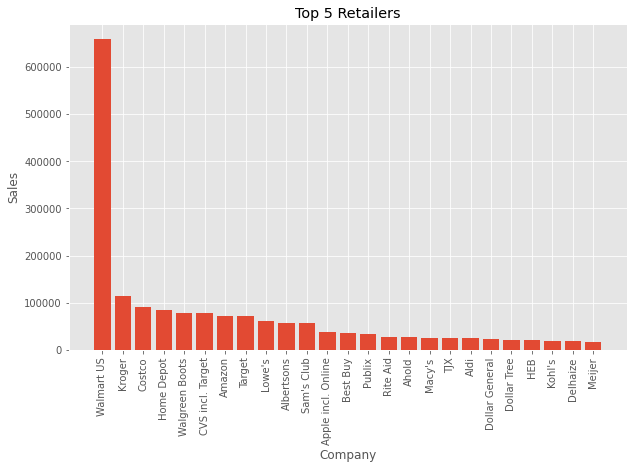

In [ ]:
x = df['Company']
y = df['Sales']

plt.figure(figsize=[10, 6])
plt.bar(x, y)
plt.title('Top 5 Retailers')
plt.xlabel('Company')
plt.ylabel('Sales')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
#Calculation of the standard deviation
df.Sales[1:].std()

28317.98184119008

In [ ]:
#calculation of the Median
df.Sales[1:].median()

34694.0

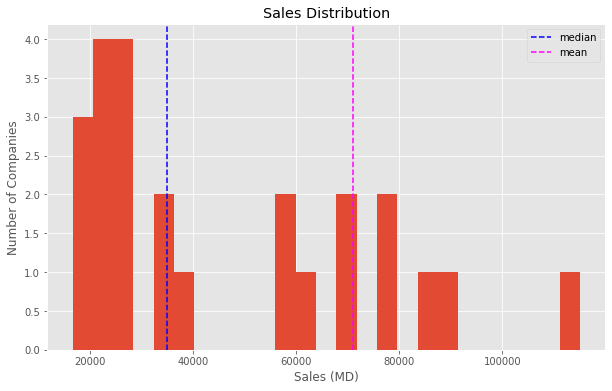

In [ ]:
#Graph of the distribution of sales based on the number of companies
x = df.Sales[1:]

plt.figure(figsize=[10, 6])
plt.hist(x, bins=25)
plt.title('Sales Distribution')
plt.ylabel('Number of Companies')
plt.xlabel('Sales (MD)')
#mean and median indicator
plt.axvline(df.Sales.median(), color='blue', label='median', linestyle='--')
plt.axvline(df.Sales.mean(), color='magenta', label='mean', linestyle='--')
plt.legend()
plt.show()

- The mean, not including the dominant company, is $46,602.4 M. However, this value is not representative since the sales of the second company bias the result.
- A representative value could be the median with $34694 M since it is useful for cases in which the values are biased.

### 2. How much money in sales did most companies generate?

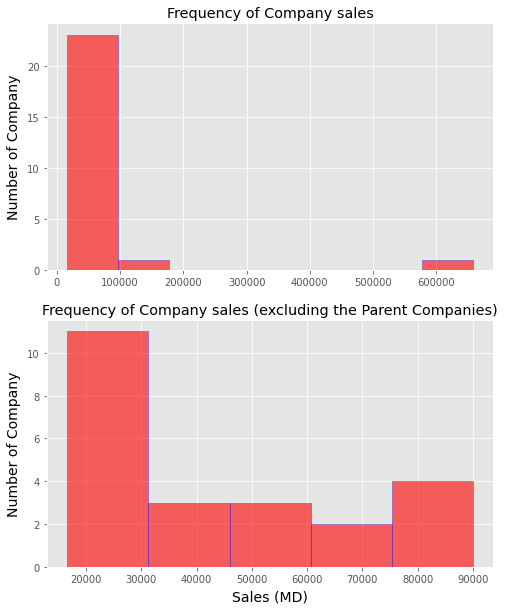

In [ ]:
#Histogram display of results
df = pd.read_csv('largest_us_retailers.csv')
fig, ax = plt.subplots(2, 1, sharey=False, figsize=[8, 10])

x1 = df['Sales'][:]
x2 = df['Sales'][2:]

ax[0].hist(x1, bins=8,color='red', ec= 'blue', alpha = 0.6)
ax[0].set_title('Frequency of Company sales')
ax[0].set_ylabel('Number of Company', color='black', weight='normal', size = 14,labelpad = 6)


ax[1].hist(x2, bins=5,color='red', ec= 'blue', alpha = 0.6)
ax[1].set_title('Frequency of Company sales (excluding the Parent Companies)')
ax[1].set_xlabel('Sales (MD)', color='black', weight='normal', size = 14,labelpad = 6)
ax[1].set_ylabel('Number of Company', color='black', weight='normal', size = 14,labelpad = 6)

plt.show()


In [ ]:
min_sales = df.Sales[2:].min()
max_sales = df.Sales[2:].max()
print('Minimo sales: ',min_sales)
print('Maxim sales: ',max_sales)

Minimo sales:  16592
Maxim sales:  90048


Sales range from  16592 to  90048 MD. This range does not include dominant companies as they have sales that skew results.


### 3. How many stores do most companies have?

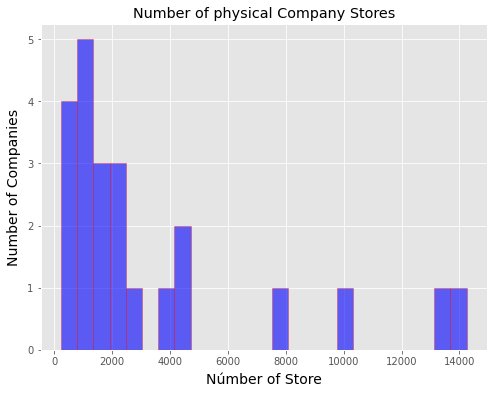

In [ ]:
#Histogram display of results
df = pd.read_csv('largest_us_retailers.csv')
filtrado = df['Stores']

plt.figure(figsize=[8, 6])
plt.hist(x = filtrado, bins=25,color='blue', ec= 'red', alpha = 0.6)
plt.title('Number of physical Company Stores')
plt.xlabel('Númber of Store', color='black', weight='normal', size = 14,labelpad = 6)
plt.ylabel('Number of Companies', color='black', weight='normal', size = 14,labelpad = 6)

plt.show()

In [ ]:
df = df.sort_values('Stores', ascending=False)
min_store =df.Stores[5:].min()
max_store = df.Stores[5:].max()
print(min_store, max_store)

231.0 4553.0


The graph shows that 19 of the 25 companies (the majority) have a range of stores from 231 to 4553 physical stores.

4 companies of the 6 remaining companies have a wide margin of difference with respect to the majority of the companies ranging from 8000 to 10500 stores.

2 companies do not have physical stores.

### 4. Is the number of stores related to the number of sales? In other words, if a company has more stores will it have more money from sales?

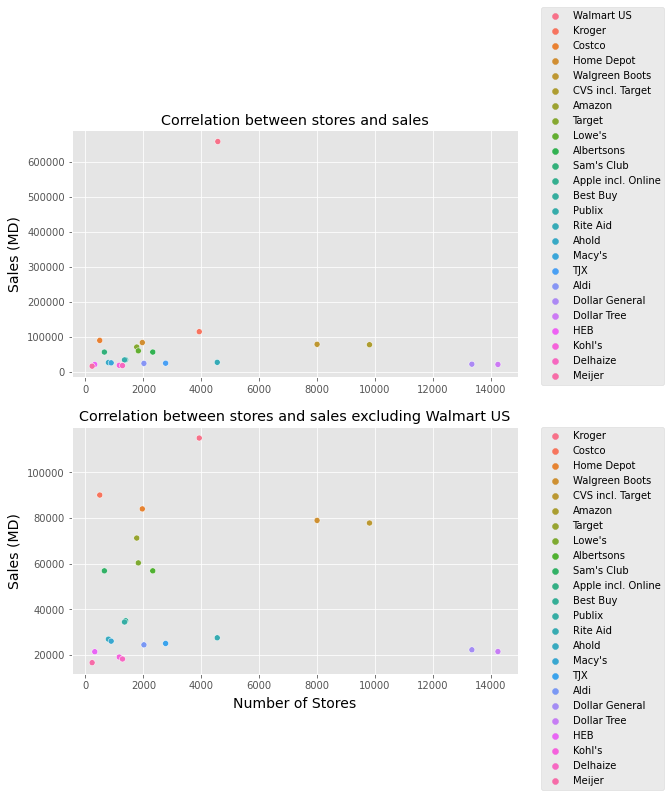

In [ ]:
df = pd.read_csv('largest_us_retailers.csv')
df1 = df.drop([0])

fig, ax = plt.subplots(2, 1, sharey=False, figsize=[8, 10])
sns.scatterplot(data=df, x='Stores', y='Sales', hue = 'Company', ax = ax[0])
ax[0].legend(bbox_to_anchor=(1.05, 1.5), loc='upper left', borderaxespad=0)
ax[0].set_title('Correlation between stores and sales')
ax[0].set_xlabel(' ')
ax[0].set_ylabel('Sales (MD)', color='black', weight='normal', size = 14,labelpad = 6)

sns.scatterplot(data=df1, x='Stores', y='Sales', hue = 'Company',ax = ax[1])
ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax[1].set_title('Correlation between stores and sales excluding Walmart US')
ax[1].set_xlabel('Number of Stores', color='black', weight='normal', size = 14,labelpad = 6)
ax[1].set_ylabel('Sales (MD)', color='black', weight='normal', size = 14,labelpad = 6)

plt.show()

The first graph indicates that the two companies with more than 100,000 MD, such as Walmart US and Kroger, have between 4,000 and 5,000 physical stores. While companies such as Dollar Tree and Dollar General, which have more than 130,000 physical stores, do not reach more than 10,000 MD. This shows that there is no evidence linking the number of physical stores to sales.

In the second graph we excluded Walmart US because of its particular sales volume to check that it was not influencing the behavior of the points in the graph. Indeed, it shows that there is no linear relationship between the number of physical stores and a company's sales, i.e., a company that has more physical stores is not necessarily the one that sells more.


In [6]:
#Calculation of Pearson's coefficient
df.Stores.corr(df.Sales)

0.06330142261164261

Clearly, the Pearson coefficient is very low (0.06), indicating that there is no correlation between the number of stores and sales.

### 5. What is the range between sales?

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


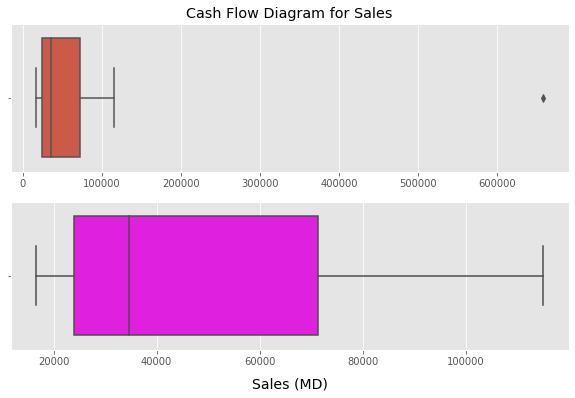

98445


In [ ]:
df = pd.read_csv('largest_us_retailers.csv')

#Visualization of the results by means of a Box Diagram
fig, ax = plt.subplots(2,1,sharey=False, figsize=[10, 6])
sns.boxplot(df['Sales'], ax = ax[0])
ax[0].set_title('Cash Flow Diagram for Sales')
ax[0].set_xlabel(' ')

sns.boxplot(df['Sales'][1:], ax = ax[1], color = 'magenta')
ax[1].set_xlabel('Sales (MD)', color='black', weight='normal', size = 14,labelpad = 10)
plt.show()

#Calculation of the range between sales
min_sales = df['Sales'][1:].min()
max_sales = df['Sales'][1:].max()
range_sales = max_sales - min_sales
print(range_sales) 



The first boxplot shows us an outliers which is about the Walmart US sale. We do not take it into account to get a good approximation, through the data, of reality.

In the second boxplot we exclude the Walmart US company and obtain a sales range of $98445 M which corresponds to the difference between the company with the highest sales and the company with the lowest sales.

### 6. Which 5 companies have the most physical stores? Which of them are in the top 5 companies with the highest sales?

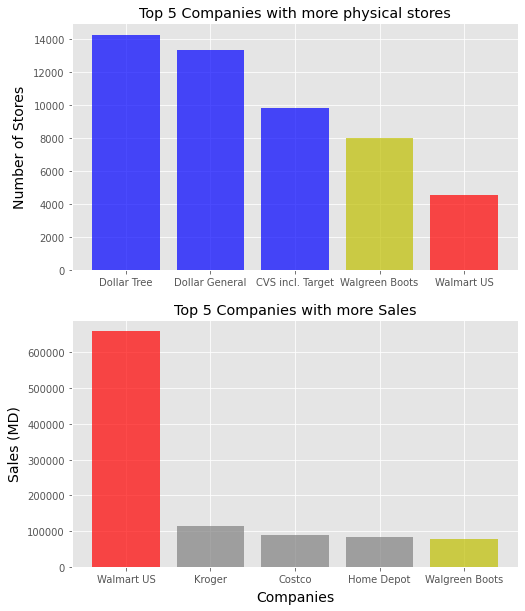

In [ ]:
df = pd.read_csv('largest_us_retailers.csv')

df_Store = df.sort_values('Stores', ascending=False)
x1 = df_Store['Company'][:5]
y1 = df_Store['Stores'][:5]
df = df.sort_values('Sales', ascending=False)
x2 = df['Company'][:5]
y2 = df['Sales'][:5]

#Visualization of data in a bar chart
fig, ax = plt.subplots(2, 1, sharey=False, figsize=[8, 10])
ax[0].bar(x1,y1, color = 'blue', alpha = 0.7)
ax[0].set_title('Top 5 Companies with more physical stores')
ax[0].set_ylabel('Number of Stores', color='black', weight='normal', size = 14,labelpad = 6)
ax[0].patches[4].set_facecolor('red')
ax[0].patches[3].set_facecolor('y')

ax[1].bar(x2,y2, color = 'gray', alpha = 0.7)
ax[1].set_title('Top 5 Companies with more Sales')
ax[1].set_xlabel('Companies', color='black', weight='normal', size = 14,labelpad = 6)
ax[1].set_ylabel('Sales (MD)', color='black', weight='normal', size = 14,labelpad = 6)
ax[1].patches[0].set_facecolor('red')
ax[1].patches[4].set_facecolor('y')

plt.show()



The companies with the most physical stores are Dollar Tree, Dollar General, CVS incl. Target, Waldreen Boots and Walmart US as shown in the first chart. Of those companies, Walmart US and Walgreen Boots are among the top 5 best-selling companies.

It is important to note that Walmart US, despite having just over 4,000 stores, leads the market in terms of sales. While Walgreen Boots, despite having almost twice as many stores as Walmart US, falls short of the 100,000 MDD in terms of sales, far short of the dominant company.

These results confirm that a higher number of sales does not necessarily generate a higher number of sales.

### 7. Which company category generated the most sales?

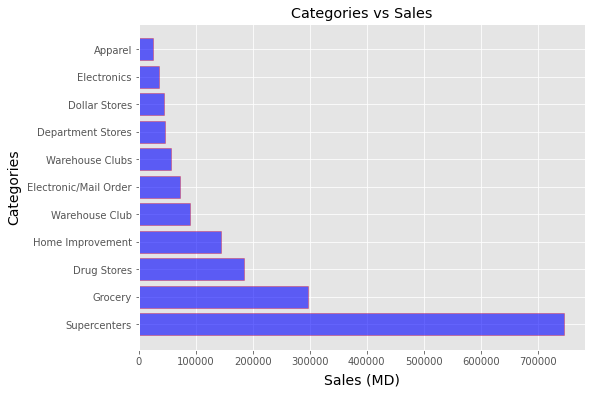

In [ ]:
df = pd.read_csv('largest_us_retailers.csv')

#We group the values of Category and add the sales of each company together
df_category = df.groupby(['Category']).agg({'Sales': 'sum'})

#We order the sales from highest to lowest
df_category = df_category.sort_values('Sales', ascending = False)
df_category = df_category.reset_index()

x = df_category['Category']
y = df_category['Sales']

#Visualization of data in a bar chart
plt.figure(figsize=[8, 6])

plt.barh(x,y, color='blue', ec = 'red', alpha = 0.6)
plt.title('Categories vs Sales')
plt.ylabel('Categories', color='black', weight='normal', size = 14,labelpad = 6)
plt.xlabel('Sales (MD)', color='black', weight='normal', size = 14,labelpad = 6)
plt.show()

At a glance we see that the company category with the highest sales is Supercenter which reaches sales of more than 750000 MD, more than double the sales of the category that occupies the second place (Grosery).

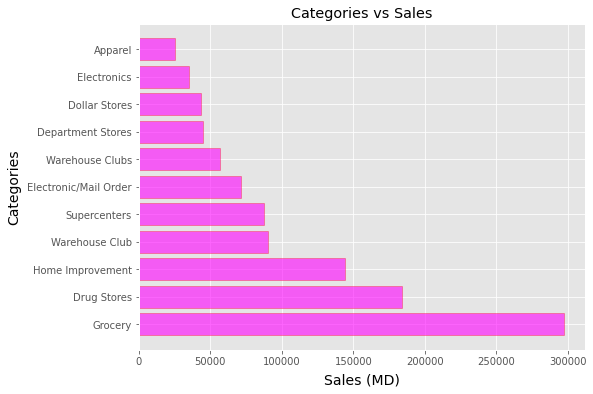

In [ ]:
df = pd.read_csv('largest_us_retailers.csv')
df = df.drop([0])

#We group the values of Category and add the sales of each company together
df_category = df.groupby(['Category']).agg({'Sales': 'sum'})

#We order the sales from highest to lowest
df_category = df_category.sort_values('Sales', ascending = False)
df_category = df_category.reset_index()

x = df_category['Category']
y = df_category['Sales']

#Display of the data using a bar graph
plt.figure(figsize=[8, 6])

plt.barh(x,y, color='magenta', ec = 'red', alpha = 0.6)
plt.title('Categories vs Sales')
plt.ylabel('Categories', color='black', weight='normal', size = 14,labelpad = 6)
plt.xlabel('Sales (MD)', color='black', weight='normal', size = 14,labelpad = 6)
plt.show()

For this case, we exclude Walmart US because its sales is an outlier and conclude that the category with the highest sales is Grocery with approximately 280000 MD, more than three times the sales of Supercenters. This category is the most competitive in terms of sales so it is not a good option to focus a company on this market

### 8. Which company generates the most sales in relation to its number of physical stores?

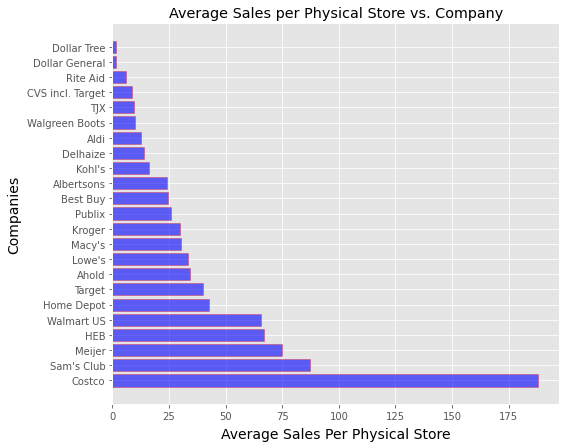

In [ ]:
df = pd.read_csv('largest_us_retailers.csv')

df_Store_Sales = df.loc[:, ['Company', 'Sales', 'Stores',  'Sales/Avg. Store']]
df_Store_Sales = df_Store_Sales.sort_values('Sales/Avg. Store', ascending = False)

#Display of results using bar graphs
plt.figure(figsize=[8, 7])
x = df_Store_Sales['Company'][:23]
y = df_Store_Sales['Sales/Avg. Store'][:23]

plt.barh(x,y, color='blue', ec = 'red', alpha = 0.6)
plt.title('Average Sales per Physical Store vs. Company')
plt.xlabel('Average Sales Per Physical Store', color='black', weight='normal', size = 14,labelpad = 6)
plt.ylabel('Companies', color='black', weight='normal', size = 14,labelpad = 6)

plt.show()


Clearly we can see that Costco is the company that generates more sales in relation to the average sales per store, with a value of $181.91 M.

Excluded from the analysis are Apple incl. Companies. Online and Amazon as they do not have physical stores.

### 9. Which companies sell exclusively online? Do your sales stand out from those who also have physical stores?

In [ ]:
#Companies that do not have physical stores
df = pd.read_csv('largest_us_retailers.csv')
print(df[df.Stores.isna()]['Company'])

6                 Amazon
11    Apple incl. Online
Name: Company, dtype: object


Companies that do not have physical stores are the ones that generate their sales online. These are Amazon and Apple incl. Online

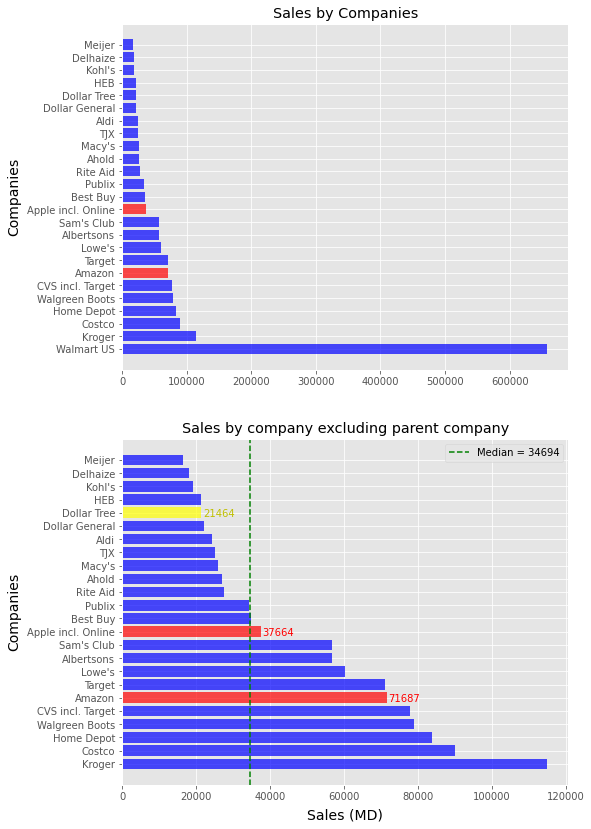

In [10]:
df = pd.read_csv('largest_us_retailers.csv')

df = df.loc[:, ['Company', 'Sales']]
df = df.sort_values('Sales', ascending = False)

y1 = df['Sales'][:]
x1 = df['Company'][:]
y2 = df['Sales'][1:]
x2 = df['Company'][1:]

#Display of results using bar graphs
fig, ax = plt.subplots(2, 1, sharey=False, figsize=[8, 14])

ax[0].barh(x1, y1, color = 'blue', alpha = 0.7)
ax[0].set_title('Sales by Companies')
ax[0].set_ylabel('Companies',family='Arial', color='black', weight='normal', size = 14,labelpad = 6)
ax[0].patches[6].set_facecolor('red')
ax[0].patches[11].set_facecolor('red')
 
ax[1].barh(x2, y2, color = 'blue', alpha = 0.7)
ax[1].set_title('Sales by company excluding parent company')
ax[1].set_ylabel('Companies', color='black', weight='normal', size = 14,labelpad = 6)
ax[1].set_xlabel('Sales (MD)', color='black', weight='normal', size = 14,labelpad = 6)
ax[1].axvline(np.median(df['Sales'][1:]), color = 'green', linestyle = '--', label = 'Median = 34694')
ax[1].patches[5].set_facecolor('red')
ax[1].patches[10].set_facecolor('red')
ax[1].patches[19].set_facecolor('yellow')
ax[1].text(37800,9.7, '37664', fontsize=10, color='red')
ax[1].text(72000,4.7, '71687', fontsize=10, color='red')
ax[1].text(22000,18.7, '21464', fontsize=10, color='y')
ax[1].legend()

plt.show()


The first graph shows that Amazon is in seventh place in the top 25 companies in sales, while Apple incl. Online is in twelfth place, which are excellent positions considering that they do not have physical stores.

In the second graph we exclude Walmart US to amplify the differences between the companies. We observe that Amazon's sales exceed the average sales by a margin of approximately 25,000 MD and also exceeds the company with the most stores, Dollar Tree, by more than three times its sales. On the other hand, the company Apple incl. Online approaches the average sales by a margin of approximately 10000 MD being also above the sales of Dollar Tree.

Since there are only 2 companies that sell online, it cannot be concluded that they exceed the sales of physical stores.

### 10. Which companies have had the greatest growth in terms of the number of physical stores?

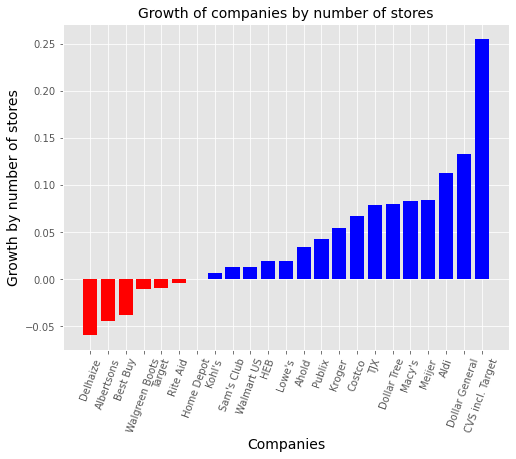

In [ ]:
df = pd.read_csv('largest_us_retailers.csv')
df = df.sort_values('Store Count Growth', ascending = True)
df[['Company','Store Count Growth']]
x = df['Company'][:23]
y = df['Store Count Growth'][:23]

fig, ax = plt.subplots(figsize=[8, 6])
plt.bar(x, y, color = 'blue')
plt.title('Growth of companies by number of stores', size = 14)
plt.xlabel('Companies', color='black', weight='normal', size = 14)
plt.ylabel('Growth by number of stores',color='black', weight='normal', size = 14)
plt.xticks(rotation = 70)
ax.patches[0].set_facecolor('red')
ax.patches[1].set_facecolor('red')
ax.patches[2].set_facecolor('red')
ax.patches[3].set_facecolor('red')
ax.patches[4].set_facecolor('red')
ax.patches[5].set_facecolor('red')
plt.show()

The 3 companies with the most new physical store openings are CVS incl. Target, Dollar General and Aldi, the first one being the one with the highest growth, almost double that of its closest competitor. It is important to note that both CVS incl. Target and Dollar General are among the top 5 companies with the most new physical stores.

It is also worth noting that Walgreen Boots and Walmart US, which are among the top 5 companies with the most physical stores and the top 5 with the best sales, have had the fewest new store openings and have even decreased their openings relative to other years.

We conclude that the companies with the best sales do not require the opening of a large number of branches as they are very well established companies. While there are companies that are opening more and more branches to gain a foothold in the market.

### 11. Which categories have the highest number of companies?

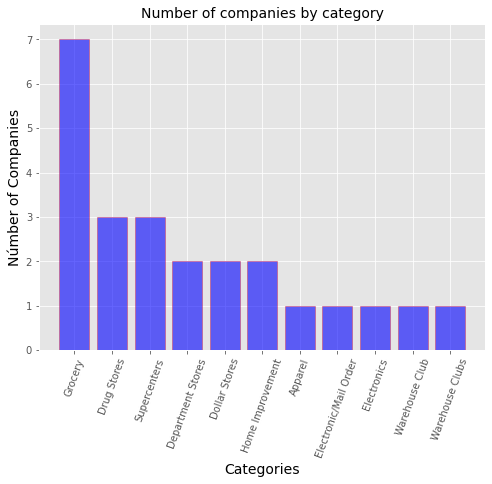

In [ ]:
df = pd.read_csv('largest_us_retailers.csv')

category = df.groupby(['Category']).agg({'Company': 'count'})

#We order the sales from highest to lowest
category = category.sort_values('Company', ascending = False)

#We set the default indices of the dataFrame
category = category.reset_index()

x = category['Category']
y = category['Company']

plt.figure(figsize=[8, 6])

plt.bar(x, y,color='blue', ec= 'red', alpha = 0.6)

plt.title('Number of companies by category',color='black', weight='normal', size = 14)
plt.ylabel('Númber of Companies',color='black', weight='normal', size = 14)
plt.xlabel('Categories', color='black', weight='normal', size = 14)
plt.xticks(rotation=70)
plt.show()

From the graph we observe that most of the companies are from the Grosery, Drugs Stores and Supercenters categories, being the first one the most competitive category with 7 companies from the same category.

From the results of question 7 we can conclude that if Walmart US is included, the category that sells the most is not necessarily the one that has the most companies. If we exclude Walmart US, we conclude that the category that sells the most is the one with the most companies and therefore the one with the most competition. The reality is much closer to the second case.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8735fda7-e84a-4693-bf29-dadf426e611e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>